In [193]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [194]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [195]:
data.drop('Id',axis=1,inplace=True)

In [196]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [197]:
data.duplicated().sum()

3

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [199]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [200]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [201]:
species_counts = data['Species'].value_counts()
species_counts

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

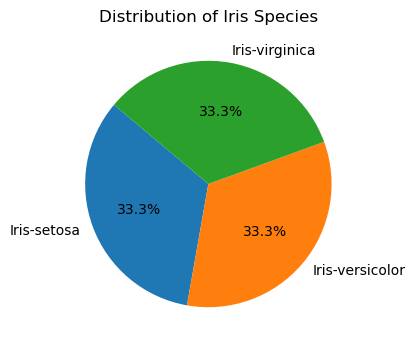

In [202]:
plt.figure(figsize=(8,4))
plt.pie(species_counts,labels=species_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Iris Species')
plt.show()

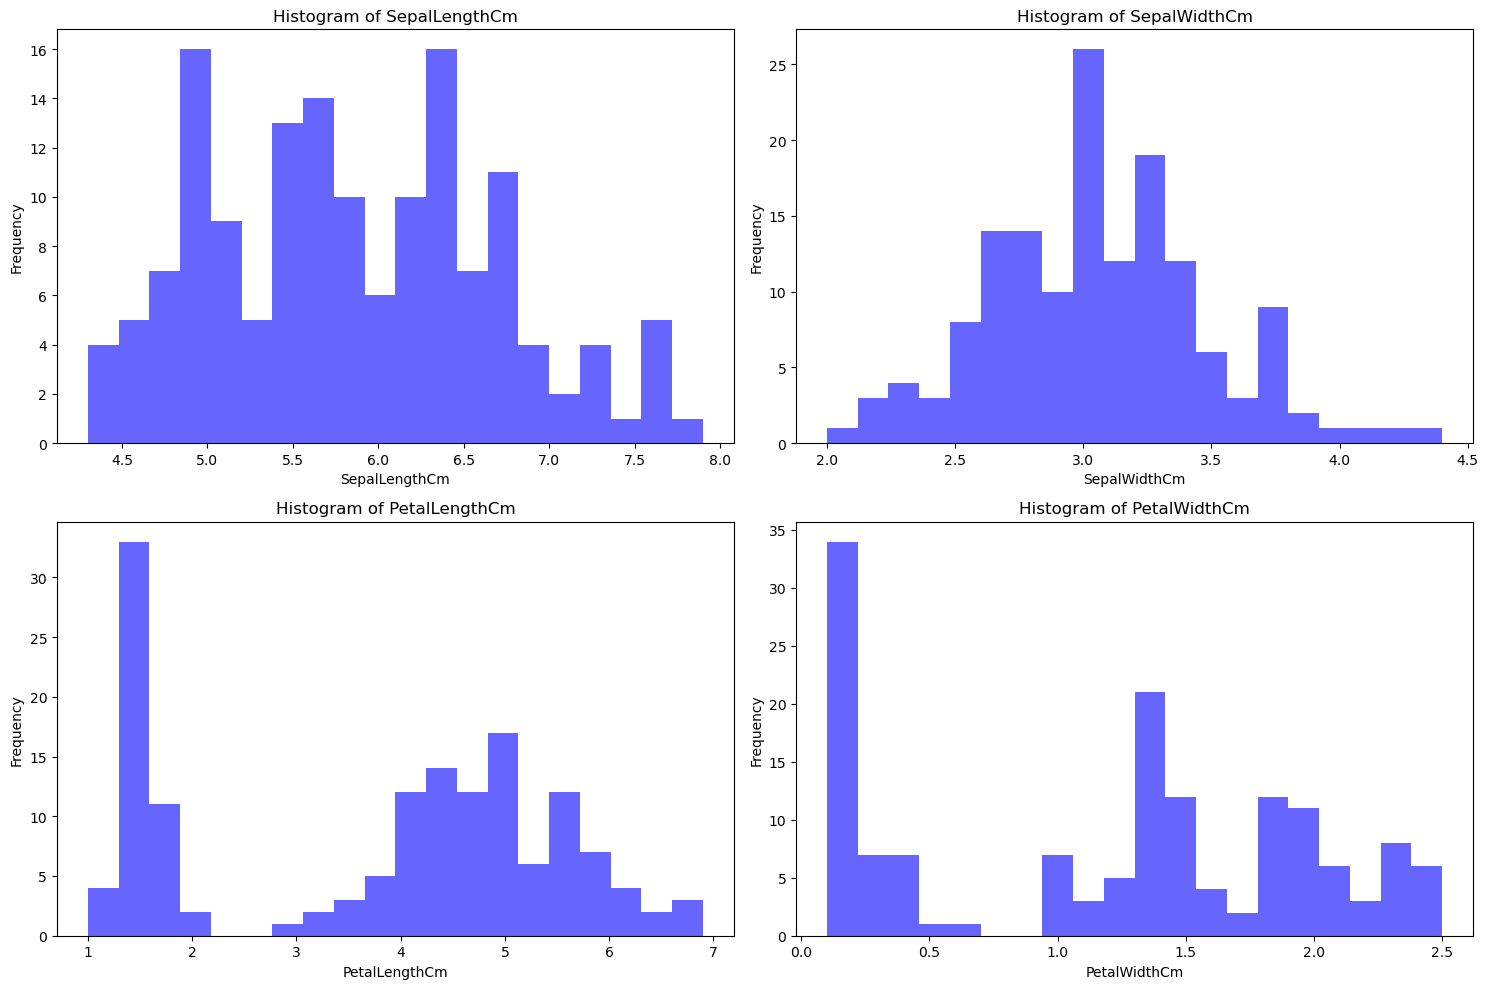

In [203]:
columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier
for i,column in enumerate(columns):
    axes[i].hist(data[column], bins=20, alpha=0.6, color='b')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

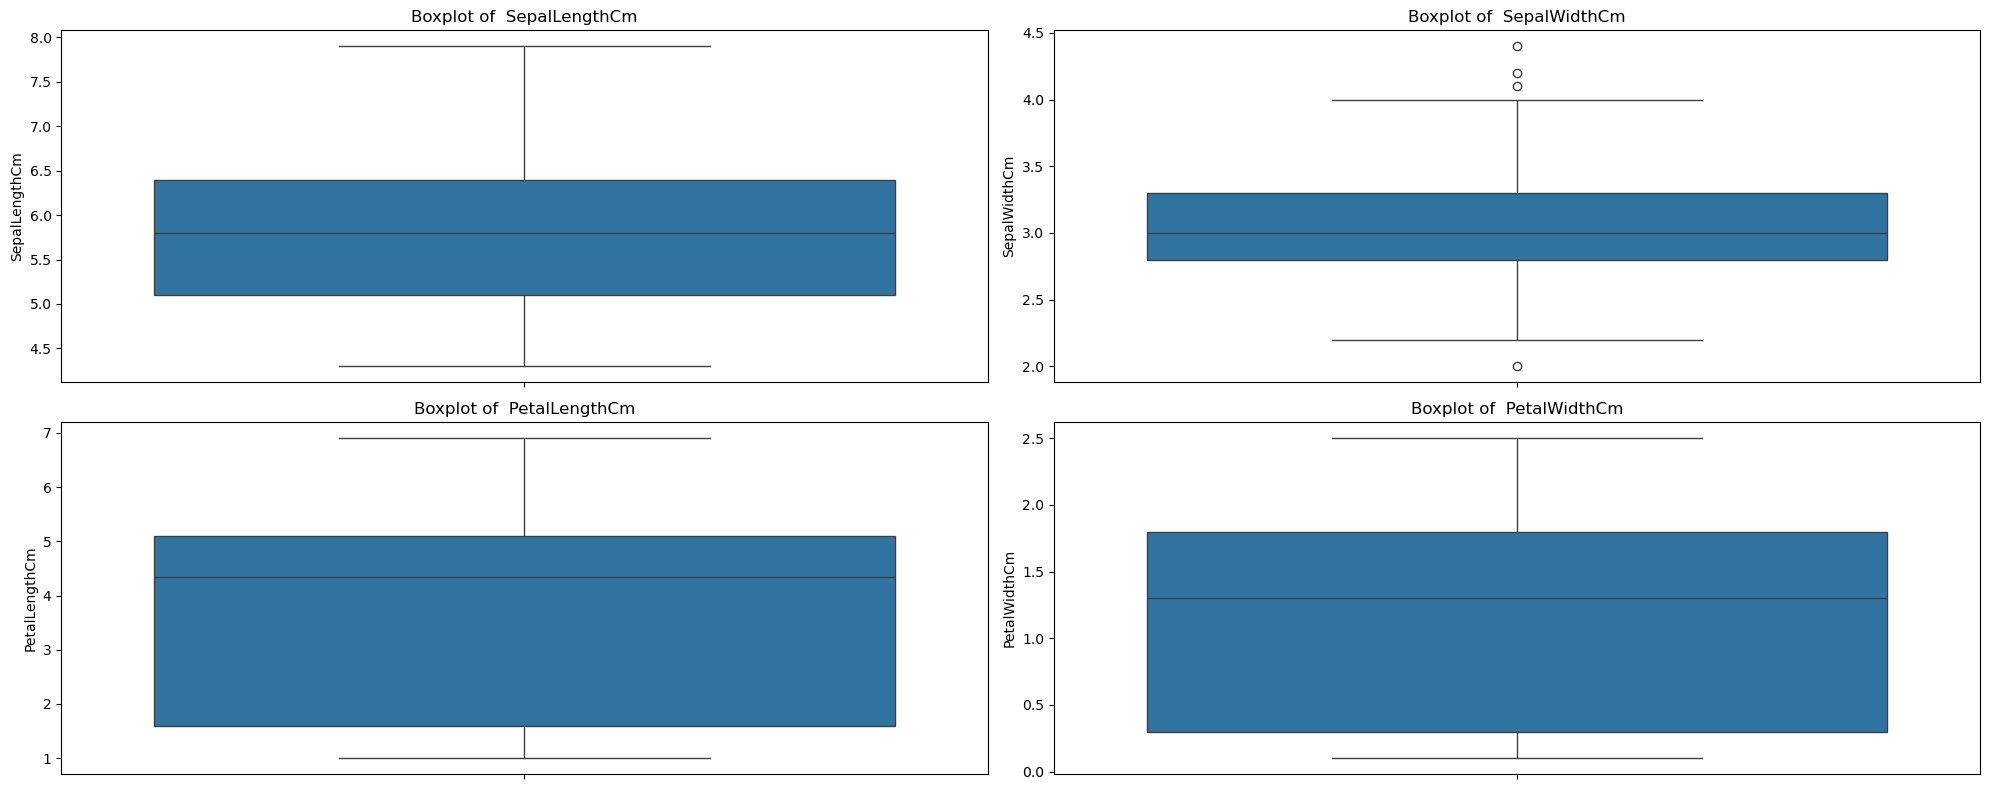

In [204]:
columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(20,8))
for i ,col in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[col])
    plt.title('Boxplot of  '+col)
    plt.tight_layout()

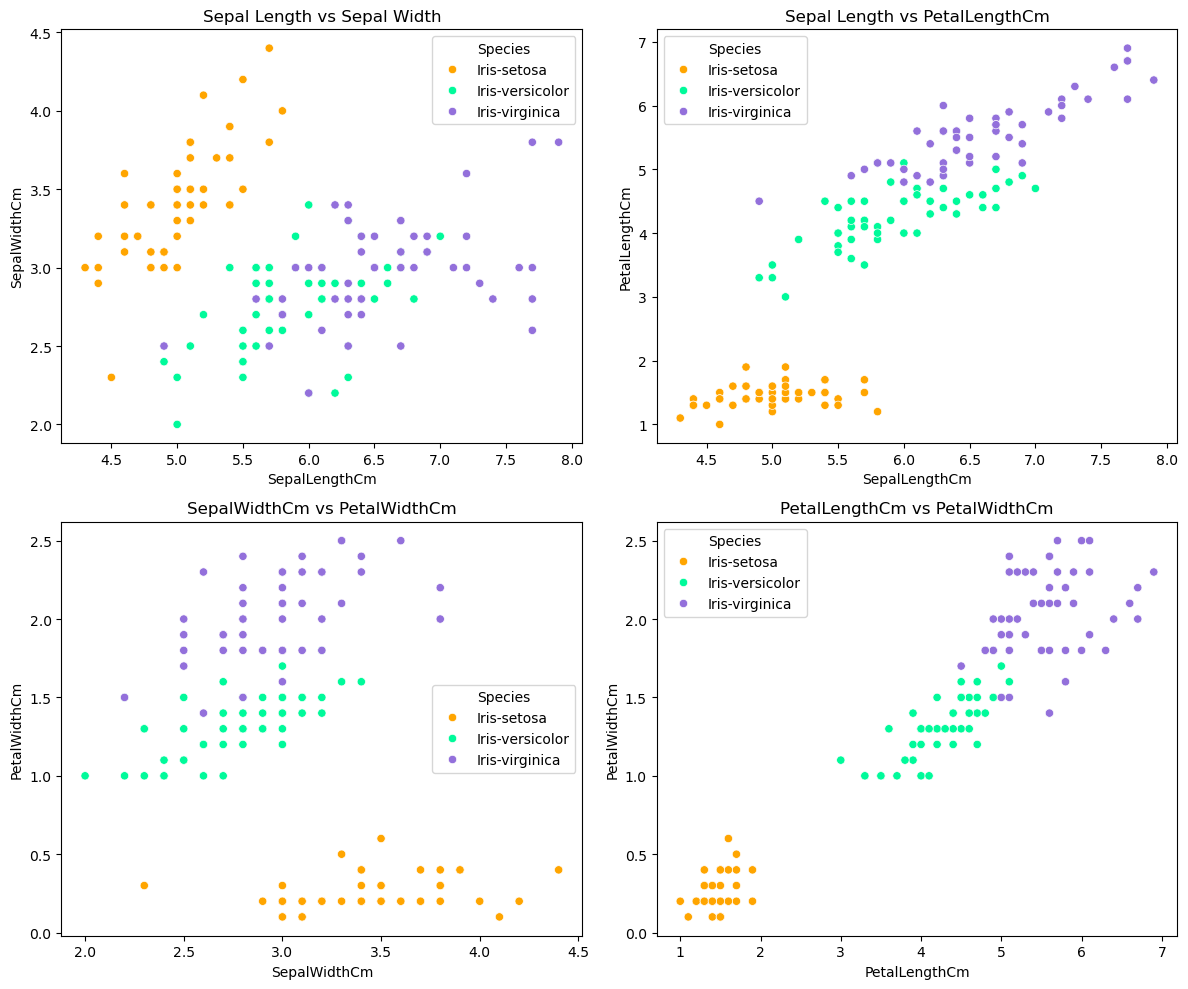

In [23]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
colors=['orange','MediumSpringGreen','MediumPurple']
sns.scatterplot(data,x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette=colors,ax=axes[0,0])
axes[0,0].set_title('Sepal Length vs Sepal Width')

sns.scatterplot(data,x='SepalLengthCm',y='PetalLengthCm',hue='Species',palette=colors,ax=axes[0,1])
axes[0,1].set_title('Sepal Length vs PetalLengthCm')

sns.scatterplot(data,x='PetalLengthCm',y='PetalWidthCm',hue='Species',palette=colors,ax=axes[1,1])
axes[1,1].set_title('PetalLengthCm vs PetalWidthCm')

sns.scatterplot(data,x='SepalWidthCm',y='PetalWidthCm',hue='Species',palette=colors,ax=axes[1,0])
axes[1,0].set_title('SepalWidthCm vs PetalWidthCm')

plt.tight_layout()
plt.show()

# Heatmap

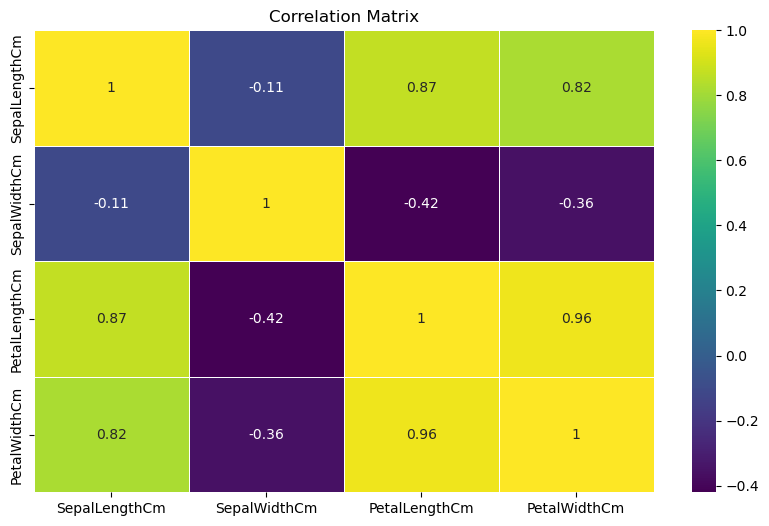

In [24]:
plt.figure(figsize=(10,6))
corr=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# LabelEncodeing

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# encoded=pd.get_dummies(data['Species']).astype(int)
# encoded.head()

In [26]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

# Iris_Prediction

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score

In [ ]:
y=data['Species']
X=data.drop('Species',axis=1)

In [146]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

1- SVC

In [169]:
from sklearn.svm import SVC
model_1=SVC()

In [170]:
model_1.fit(X_train,y_train)

SVC()

In [171]:
y_pred_1=model_1.predict(X_test)

In [172]:
accuracy_1=accuracy_score(y_pred_1,y_test) * 100
accuracy_1

100.0

2- RandomForest

In [175]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier()

In [176]:
model_2.fit(X_train ,y_train)

RandomForestClassifier()

In [ ]:
y_pred_2=model_2.predict(X_test)


In [177]:
accuracy_2=accuracy_score(y_pred_2,y_test)*100
print("Accuracy for RandomForest is : ",accuracy_2)


Accuracy for RandomForest is :  100.0


3- KNN

In [178]:
from sklearn.neighbors import KNeighborsClassifier
model_3=KNeighborsClassifier()

In [179]:
model_3.fit(X_train,y_train)

KNeighborsClassifier()

In [180]:
y_pred_3=model_3.predict(X_test)

In [181]:
accuracy_3=accuracy_score(y_pred_3,y_test)*100
print("Accuracy for KNeighbors is : ",accuracy_3)

Accuracy for KNeighbors is :  100.0


4- DecisionTree

In [182]:
from sklearn.tree import DecisionTreeClassifier
model_4=DecisionTreeClassifier()

In [183]:
model_4.fit(X_train,y_train)

DecisionTreeClassifier()

In [184]:
y_pred_4=model_4.predict(X_test)

In [185]:
accuracy_4=accuracy_score(y_pred_4,y_test)*100
print("Accuracy for DecisionTree is : ",accuracy_4)


Accuracy for DecisionTree is :  100.0


# confusion_matrix

In [188]:
plt.figure(figsize=(8,6))
confusion=confusion_matrix(y_pred_1,y_test)
confusion

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<Figure size 800x600 with 0 Axes>

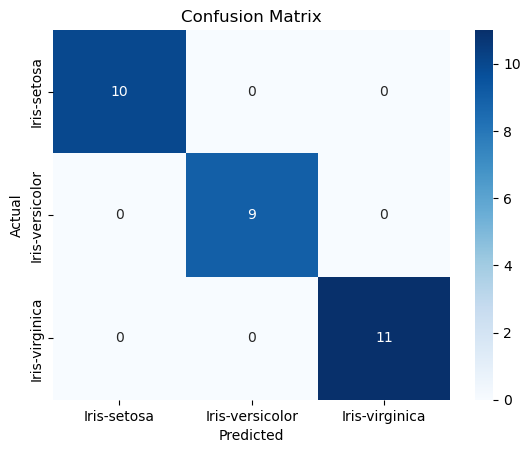

In [187]:
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.heatmap(confusion,annot=True,cmap='Blues',fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()